In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#获取特征点
def sift_kp(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d_SIFT.create()
    kp,des = sift.detectAndCompute(image,None)
    kp_image = cv2.drawKeypoints(gray_image,kp,None)
    return kp_image,kp,des

#匹配
def get_good_match(des1,des2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)
    return good
 
def siftImageAlignment(img1,img2):
    _,kp1,des1 = sift_kp(img1)
    _,kp2,des2 = sift_kp(img2)
    goodMatch = get_good_match(des1,des2)
    if len(goodMatch) > 4:
        ptsA= np.float32([kp1[m.queryIdx].pt for m in goodMatch]).reshape(-1, 1, 2)
        ptsB = np.float32([kp2[m.trainIdx].pt for m in goodMatch]).reshape(-1, 1, 2)
        ransacReprojThreshold = 4
        H, status =cv2.findHomography(ptsA,ptsB,cv2.RANSAC,ransacReprojThreshold);
        imgOut = cv2.warpPerspective(img2, H, (img1.shape[1],img1.shape[0]),flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    return imgOut,H,status

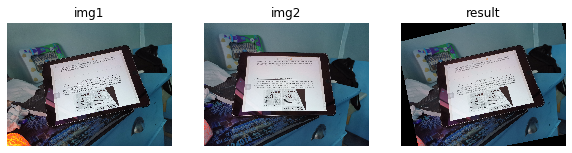

In [2]:
img1 = cv2.imread('images/shift1.jpg')
img2 = cv2.imread('images/shift2.jpg')    
result,_,_ = siftImageAlignment(img1,img2)

plt.figure(figsize=(10,8)) #设置窗口大小
plt.subplot(1,3,1), plt.title('img1')
plt.imshow(img1), plt.axis('off')
plt.subplot(1,3,2), plt.title('img2')
plt.imshow(img2), plt.axis('off')
plt.subplot(1,3,3), plt.title('result')
plt.imshow(result), plt.axis('off')
plt.show()